In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

C:\Users\Yana\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Yana\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
data = pd.read_csv('gapminder.csv')
data.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


In [3]:
# dropping empty values
sample_data = data[['internetuserate', 'polityscore', 'urbanrate']]
sample_data = sample_data.replace(' ', np.nan)
print('Number of regions before dropping None:', len(sample_data))
sample_data = sample_data.dropna()
print('Number of regions without None:', len(sample_data))

Number of regions before dropping None: 213
Number of regions without None: 155


In [4]:
sample_data['internetuserate'] = pd.to_numeric(sample_data['internetuserate'])
sample_data['polityscore'] = pd.to_numeric(sample_data['polityscore'])
sample_data['urbanrate'] = pd.to_numeric(sample_data['urbanrate'])
sample_data.head()

,internetuserate,polityscore,urbanrate
0,3.654122,0,24.04
1,44.989947,9,46.72
2,12.500073,2,65.22
4,9.999954,-2,56.70
6,36.000335,8,92.00


In [5]:
print('Mean polity score before scaling:', np.mean(sample_data['polityscore']))
sample_data['polityscore_scaled'] = scale(sample_data['polityscore'])
print('Mean polity score after scaling:', np.mean(sample_data['polityscore_scaled']))
print('Mean urban rate before scaling:', np.mean(sample_data['urbanrate']))
sample_data['urbanrate_scaled'] = scale(sample_data['urbanrate'])
print('Mean urban rate after scaling:', np.mean(sample_data['urbanrate_scaled']))

Mean polity score before scaling: 3.8451612903225807
Mean polity score after scaling: -8.344579507666499e-17
Mean urban rate before scaling: 55.37354838709676
Mean urban rate after scaling: 2.535606133660035e-16


In [6]:
reg = smf.ols('internetuserate ~ polityscore_scaled + urbanrate', data=sample_data).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:        internetuserate   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     80.96
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           1.15e-24
Time:                        15:15:14   Log-Likelihood:                -676.79
No. Observations:                 155   AIC:                             1360.
Df Residuals:                     152   BIC:                             1369.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -9.3806      4

* Both of the P values < 0.05. It means that both variables are significantly associated with Internet user rate. 
* The assosiations is positive: polity score Beta = 7.2728 and urban rate Beta = 0.7569. The results support my previous hypothesis for the association between Internet user rate and polity score.
* From the data above we can conclude urban rate does not confound the relationship between Internet user rate and polity score. 

### Q-Q plot
Residuals mostly follow the line, but they slightly deviate at the end and the beginning of it. Residuals are not perfectly normally distributed, so it is possible to choose the better fitting model.

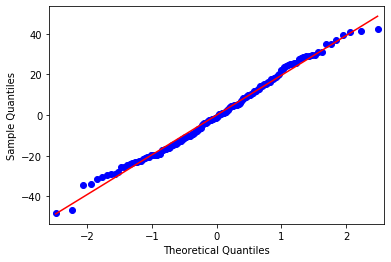

In [7]:
qq_fig = sm.qqplot(reg.resid, line='r')

### Standardized residuals 
The are only about 5 observations that are slightly bigger than 2 or -2 and they could be outlier. 5/155 = 0.032 which is less than 5% of the data -> model error is acceptable.

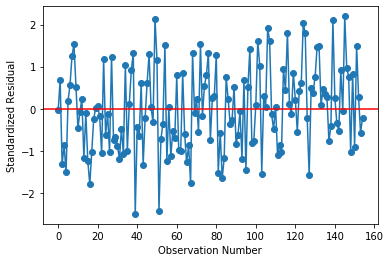

In [12]:
stdres = pd.DataFrame(reg.resid_pearson)
std_fig = plt.plot(stdres, 'o', ls=None)
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
plt.show()

### Leverage plot
Most of the observations that influence the estimation of the predicted value the most are not the outliers. There are some outliers with quite a big influence, but most of them have an average influence.

Figure(432x288)


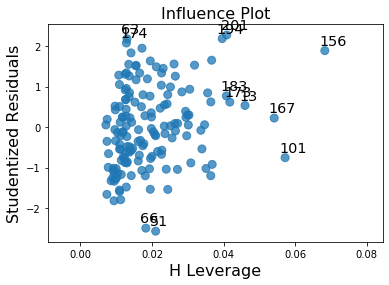

In [15]:
lev_fig = sm.graphics.influence_plot(reg, size=8)
print(lev_fig)